## Goal

*The goal of this project is to analyze rental data for the city of Zurich, Switzerland in order to understand pricing, price variations per location, and most advantageous options maximizing high sqm and rent price.*

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#Upload file
file_path = r"C:\Users\rodri\Desktop\Data samples\realestate_data_ch.csv"
df = pd.read_csv(file_path)

#Get summary of df
df.info(), df.head()

# Check for null values and their locations
null_values = df.isnull().sum()

# Check for duplicated rows and their count
duplicate_rows = df.duplicated().sum()

# Display results
null_values, duplicate_rows





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   web-scraper-order  65 non-null     object 
 1   links-href         65 non-null     object 
 2   rent_amount_chf    65 non-null     object 
 3   number_of_rooms    65 non-null     float64
 4   squared_meters     65 non-null     int64  
 5   street_address     62 non-null     object 
 6   zip_code           62 non-null     float64
 7   city               65 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.2+ KB


(web-scraper-order    0
 links-href           0
 rent_amount_chf      0
 number_of_rooms      0
 squared_meters       0
 street_address       3
 zip_code             3
 city                 0
 dtype: int64,
 0)

In [3]:
# Data Cleaning

# # Convert rent_amount_chf to numeric (remove commas and convert to integer)
df['rent_amount_chf'] = df['rent_amount_chf'].str.replace(',', '').astype(int)

# Convert nulls into 0,and round up Zip code
df['zip_code'] = df['zip_code'].fillna(0)
df['zip_code'] = np.round(df['zip_code']).astype(int)

# Drop unnecessary columns (web-scraper-order and links-href)
df_cleaned = df.drop(columns=['web-scraper-order', 'links-href'])

# Remove rows without zip code
df_cleaned = df_cleaned[df_cleaned['zip_code'] != 0]

df_cleaned


,rent_amount_chf,number_of_rooms,squared_meters,street_address,zip_code,city
0,4150,4.5,115,Turnerstrasse 32,8006,Zurich
1,2300,4.5,80,Winzerstrasse 112,8049,Zurich
2,2300,4.5,100,Albisstrasse 161,8038,Zurich
3,4015,4.5,100,Rötelstrasse 11,8006,Zurich
4,4410,4.5,91,Eibenstrasse 18,8045,Zurich
...,...,...,...,...,...,...
60,3560,4.5,106,Frankentalstrasse 37,8049,Zurich
61,4490,4.5,115,Limmattalstrasse 266,8049,Zurich
62,3850,4.5,101,Meier-Bosshard-Strasse 9,8048,Zurich
63,3850,4.5,103,Katzenbachstrasse 239,8052,Zurich


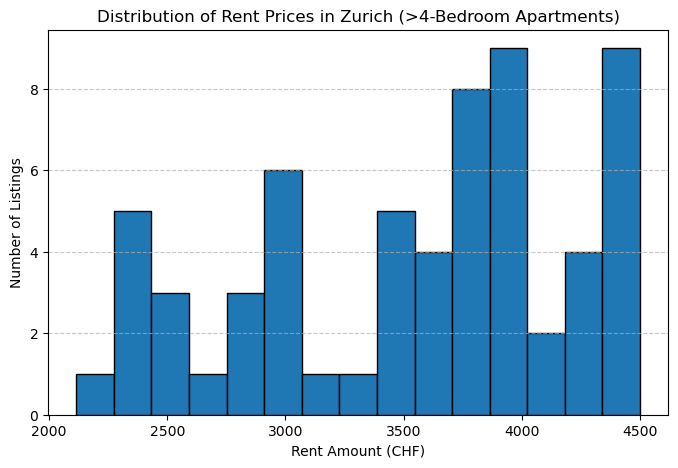

In [4]:
# Insight 1: Distribution of Rent Prices

plt.figure(figsize=(8,5))
plt.hist(df_cleaned['rent_amount_chf'], bins=15, edgecolor='black')
plt.xlabel("Rent Amount (CHF)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Rent Prices in Zurich (>4-Bedroom Apartments)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# This histogram shows the distribution of rental prices for >4-bedroom apartments in Zurich. 
# The majority of listings fall between 2,000 - 5,000 CHF, with some high-end properties reaching beyond 8,000 CHF

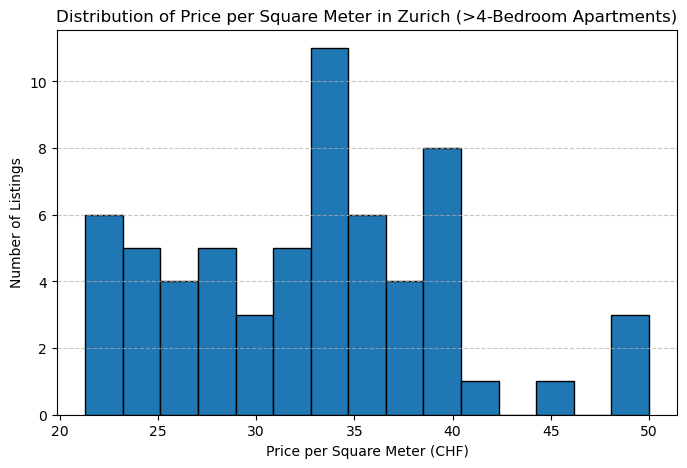

In [5]:
# Insight 2: Price per Square Meter Analysis

df_cleaned['price_per_sqm'] = df_cleaned['rent_amount_chf'] / df_cleaned['squared_meters']

plt.figure(figsize=(8,5))
plt.hist(df_cleaned['price_per_sqm'], bins=15, edgecolor='black')
plt.xlabel("Price per Square Meter (CHF)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Price per Square Meter in Zurich (>4-Bedroom Apartments)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# This chart shows how much renters pay per square meter for >4-bedroom apartments in Zurich.
# Most listings have a price per square meter in the range of 20-60 CHF.
# Some premium listings exceed 80 CHF/m², indicating high-end or luxury apartments.

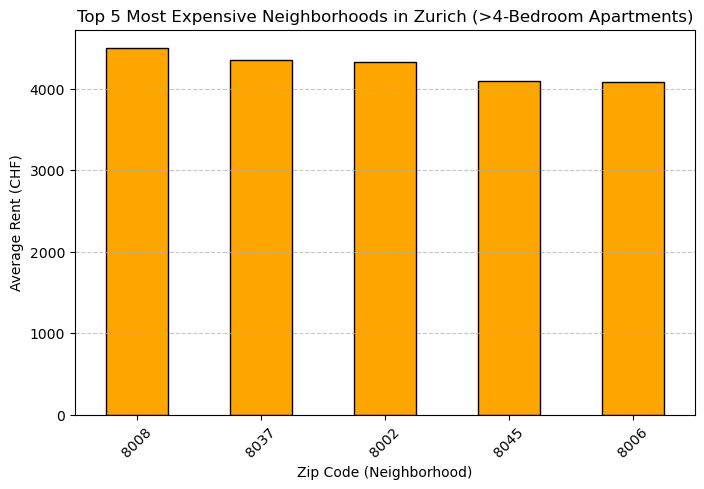

In [6]:
# Insight 3: Top 5 Most Expensive Neighborhoods by Average Rent
top_expensive_zipcodes = df_cleaned.groupby("zip_code")["rent_amount_chf"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_expensive_zipcodes.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Zip Code (Neighborhood)")
plt.ylabel("Average Rent (CHF)")
plt.title("Top 5 Most Expensive Neighborhoods in Zurich (>4-Bedroom Apartments)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# This bar chart highlights the most expensive neighborhoods based on the average rent price for >4-bedroom apartments in Zurich.
# Some zip codes consistently have higher rental prices, indicating premium locations.
# This insight is valuable for people looking for luxury rentals or identifying high-cost areas in Zurich.

In [7]:
# Identify the top 5 apartments with the highest square meters and lowest rent
top_apartments = df.sort_values(by=['squared_meters', 'rent_amount_chf'], ascending=[False, True]).head(5)

top_apartments

,web-scraper-order,links-href,rent_amount_chf,number_of_rooms,squared_meters,street_address,zip_code,city
41,1739215328-44,https://www.homegate.ch/rent/4001839614,4350,5.5,160,Heinrich-Wolff-Strasse 10,8046,Zurich
9,1739215231-12,https://www.homegate.ch/rent/4001762475,3065,5.5,144,Wiesliacher 87,8053,Zurich
5,1739215217-8,https://www.homegate.ch/rent/4001906261,3690,4.5,143,Buckhauserstrasse 1,8048,Zurich
17,1739215255-20,https://www.homegate.ch/rent/4001910970,4306,4.5,138,Freigutstrasse 20,8002,Zurich
49,1739215351-52,https://www.homegate.ch/rent/4001818232,3003,4.5,136,Ferdinand-Hodler-Strasse 7,8049,Zurich


In [8]:
import os
output_folder = r"C:\Users\rodri\Desktop\Data samples"
output_file = os.path.join(output_folder, "rent_data_zurich_analyzed.csv")

df.to_csv(output_file, index=False, encoding='utf-8')

print(f"DataFrame successfully exported to '{output_file}'")

DataFrame successfully exported to 'C:\Users\rodri\Desktop\Data samples\rent_data_zurich_analyzed.csv'
